In [1]:
from datascience import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True


## Histograms ##

In [2]:
top = Table.read_table('top_movies_2017.csv')
top

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [3]:
millions = top.select(0).with_columns('Adjusted Gross', 
                                     np.round(top.column(3)/1e6, 2))
millions

Title,Adjusted Gross
Gone with the Wind,1796.18
Star Wars,1583.48
The Sound of Music,1266.07
E.T.: The Extra-Terrestrial,1261.08
Titanic,1204.37
The Ten Commandments,1164.59
Jaws,1138.62
Doctor Zhivago,1103.56
The Exorcist,983.23
Snow White and the Seven Dwarves,969.01


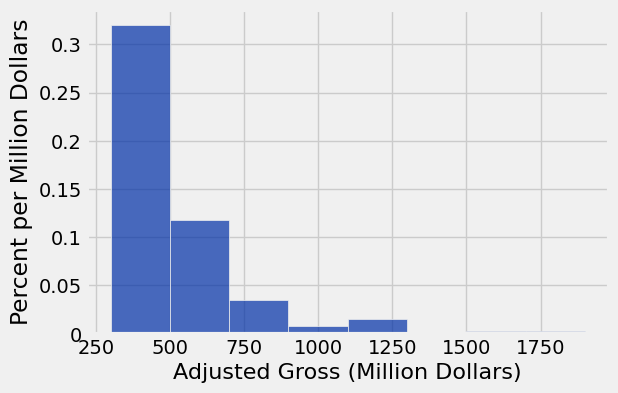

In [16]:
millions.hist('Adjusted Gross', bins=np.arange(300,2001,200), unit="Million Dollars")

# What is "percent per unit"?

In [5]:
millions_binned = millions.bin('Adjusted Gross', bins=np.arange(300,2001,200))
millions_binned

bin,Adjusted Gross count
300,128
500,47
700,14
900,3
1100,6
1300,0
1500,1
1700,1
1900,0


In [6]:
num_movies = top.num_rows
num_movies

200

In [7]:
percents = (millions_binned.column('Adjusted Gross count') / num_movies) * 100
percents

array([ 64. ,  23.5,   7. ,   1.5,   3. ,   0. ,   0.5,   0.5,   0. ])

In [8]:
percents_per_unit = percents / 200 # our bin widths are all 100
percents_per_unit

array([ 0.32  ,  0.1175,  0.035 ,  0.0075,  0.015 ,  0.    ,  0.0025,
        0.0025,  0.    ])

# Why use percent per unit?

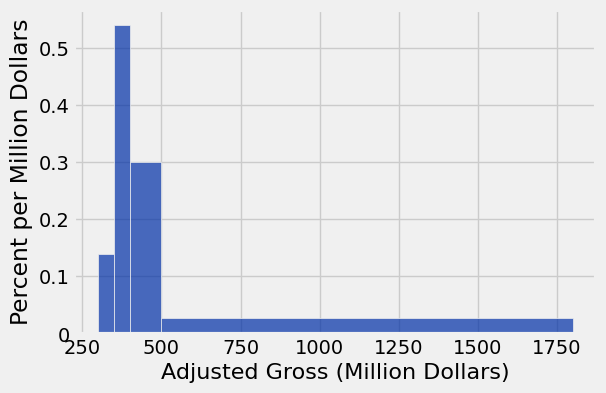

In [9]:
# Plotting again with uneven bins
uneven = make_array(300, 350, 400, 500, 1800)
millions.hist('Adjusted Gross', bins=uneven, unit="Million Dollars")

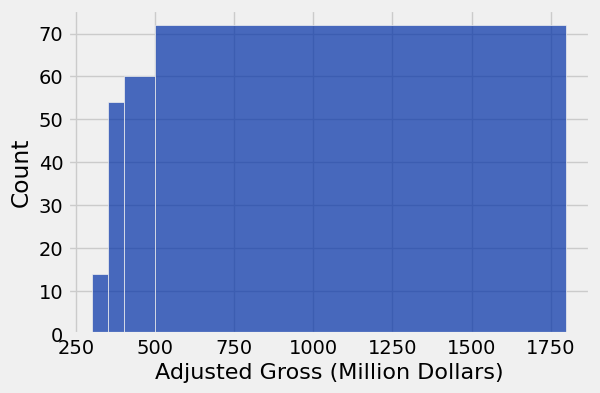

In [10]:
# Plotting the counts directly is misleading as a visualization
millions.hist('Adjusted Gross', bins=uneven, unit = 'Million Dollars', normed=False)

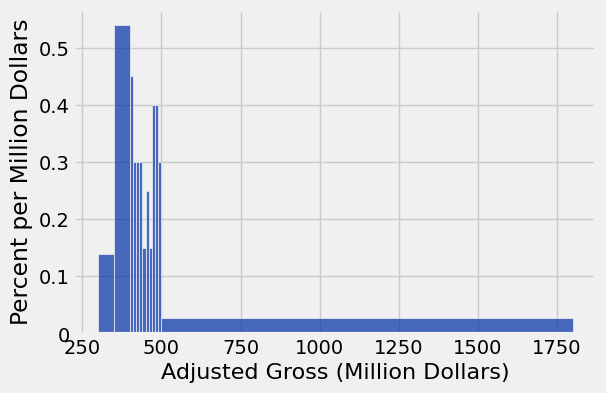

In [11]:
# Another example of the area principle
some_tiny_bins = make_array(
    300, 350, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 1800)
millions.hist('Adjusted Gross', bins=some_tiny_bins, unit='Million Dollars')

# Practice
Produce a histogram that visualizes the ages (not the year of release) of the movies in top_movies. Use 10 automatically generated bins.
1. Produce an array that contains the age of each movie.
2. Attach the array as a new column to Table top.
3. Generate the histogram of your new column.

In [12]:
years = top.column('Year')
ages = 2025 - years
ages

array([ 86,  48,  60,  43,  28,  69,  50,  60,  52,  88,  10,  64,  45,
        66,  16,  42,  32,  26,  31,  52,  44,  58,  84,  10,  53,  31,
        61,  47,  13,  60,  17,  58,  66,  41,  21,  56,  55,  23,  29,
        35,  85,  62,  41,  61,  55,  52,  72,  19,  69,  83,  51,  36,
        80,  22,  22,  51,   9,  75,  21,  73,  61,  47,  21,  20,  40,
        23,  13,  26,  47,  43,  48,   8,   9,  64,  24,  70,  48,  63,
        50,  49,  79,  53,  24,  29,  28,  68,  16,  62,  65,  50,  55,
        41,  10,  23,  32,  33,  15,  35,  12,  79,  13,  22,  72,  71,
        28,  36,  24,  12,  18,  12,  34,  84,  25,  39,  14,  26,  24,
        18,  12,   9,  22,  18,  39, 104,  27,   8,  51,  72,  41,  34,
        20,  20,  18,  23,  32,  71,  17,  14,  21,  17,  30,   8,  35,
        43,  57,  37,   9,  58,  10,  11,  46,  27,  65,  43,  18,  40,
        30,   9,  35,  51,  15,  21,  25,  33,   9,  38,  23,  11,  10,
        29,  11,  10,  48,  44,  26,  16,  22,  21,  57,  25,  2

In [13]:
top = top.with_column('Ages', ages)
top

Title,Studio,Gross,Gross (Adjusted),Year,Ages
Gone with the Wind,MGM,198676459,1796176700,1939,86
Star Wars,Fox,460998007,1583483200,1977,48
The Sound of Music,Fox,158671368,1266072700,1965,60
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,43
Titanic,Paramount,658672302,1204368000,1997,28
The Ten Commandments,Paramount,65500000,1164590000,1956,69
Jaws,Universal,260000000,1138620700,1975,50
Doctor Zhivago,MGM,111721910,1103564200,1965,60
The Exorcist,Warner Brothers,232906145,983226600,1973,52
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,88


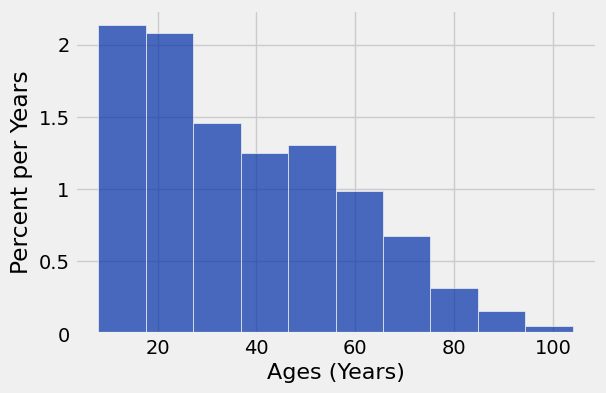

In [14]:
top.hist('Ages', bins = 10, unit = 'Years')